In [27]:
# Python program to print all heading tags
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

# scraping a wikipedia article
url_link = 'https://nypost.com/'
request = requests.get(url_link)

Soup = BeautifulSoup(request.text, 'lxml')
tag_words =[]
# creating a list of all common heading tags
heading_tags = [ "h2"]
for tags in Soup.find_all(heading_tags):
	tag_words.append(tags.text.strip())
tag_words



['Our Scholars Contest for High School students in the New York area is open! Enter Now',
 'Try the e-edition – paper format, online ease. 30 days free with code NYPOST',
 'Self care essentials for the new year. Shop Now',
 'Idaho murders roommate came face to face with black-clad killer on night of attacks: cops',
 'Harry’s royal grumble',
 'Queen of hearts\nQueen’s opinion of tequila-loving Chelsy Davy played role in Harry split',
 "Dad joke\nKing Charles made 'sadistic' jokes about Prince Harry's 'real' dad: memoir",
 'Harry admits he lied, actually did cocaine as a teenager',
 "#ShutUpHarry trends as Prince Harry's book 'Spare' leaks: 'Pathetic'",
 'Unlucky in love\nEmily Ratajkowski revelation after Davidson fling: ‘I attract the worst men’',
 'Idaho murder arrest',
 "Cops' treasure\nDNA from trash at Idaho murders suspect's family home in Pennsylvania linked him to crime",
 'FBI asked police to pull over accused Idaho butcher to get images of hands: report',
 "Accused killer's si

In [20]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in tag_words:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results, width=100)

[{'compound': -0.2023,
  'headline': "Martha MacCallum on Kevin McCarthy failing in 7th speaker vote: Many voters 'like "
              "this pushback'",
  'neg': 0.176,
  'neu': 0.691,
  'pos': 0.133},
 {'compound': 0.0,
  'headline': 'Donald Trump nominated for House speaker by Matt Gaetz',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.5859,
  'headline': 'Frustration mounts as House speaker vote drags on',
  'neg': 0.444,
  'neu': 0.556,
  'pos': 0.0},
 {'compound': 0.6597,
  'headline': 'Will Cain: The Republican Party is the party of diversity',
  'neg': 0.0,
  'neu': 0.597,
  'pos': 0.403},
 {'compound': -0.5859,
  'headline': "House speaker is the 'worst job in America, I don't know who would want it': "
              'Rep.-elect Ken Buck',
  'neg': 0.201,
  'neu': 0.735,
  'pos': 0.064},
 {'compound': 0.6597,
  'headline': 'Fairfax County mom speaks out after son’s merit award delayed',
  'neg': 0.125,
  'neu': 0.461,
  'pos': 0.414},
 {'compound': -0.6369,
  'hea

In [21]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,headline
0,0.176,0.691,0.133,-0.2023,Martha MacCallum on Kevin McCarthy failing in ...
1,0.000,1.000,0.000,0.0000,Donald Trump nominated for House speaker by Ma...
2,0.444,0.556,0.000,-0.5859,Frustration mounts as House speaker vote drags on
3,0.000,0.597,0.403,0.6597,Will Cain: The Republican Party is the party o...
4,0.201,0.735,0.064,-0.5859,"House speaker is the 'worst job in America, I ..."
...,...,...,...,...,...
194,0.000,1.000,0.000,0.0000,Return to office for NM state workers pushed t...
195,0.000,0.826,0.174,0.2263,AK judge to allow election certification of Re...
196,0.000,1.000,0.000,0.0000,"1st female system president of UNC, Molly Broa..."
197,0.000,1.000,0.000,0.0000,"China defends its COVID handling after WHO, Bi..."


In [22]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.176,0.691,0.133,-0.2023,Martha MacCallum on Kevin McCarthy failing in ...,-1
1,0.000,1.000,0.000,0.0000,Donald Trump nominated for House speaker by Ma...,0
2,0.444,0.556,0.000,-0.5859,Frustration mounts as House speaker vote drags on,-1
3,0.000,0.597,0.403,0.6597,Will Cain: The Republican Party is the party o...,1
4,0.201,0.735,0.064,-0.5859,"House speaker is the 'worst job in America, I ...",-1


In [23]:
textblob_sentiment=[]
for s in tag_words:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

flat_words= ' '.join(tag_words)
t_data = (word_tokenize(flat_words))

In [25]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [26]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Martha MacCallum on Kevin McCarthy failing in ...,0.50000,0.500000
1,Donald Trump nominated for House speaker by Ma...,0.00000,0.000000
2,Frustration mounts as House speaker vote drags on,0.00000,0.000000
3,Will Cain: The Republican Party is the party o...,0.00000,0.000000
4,"House speaker is the 'worst job in America, I ...",-1.00000,1.000000
...,...,...,...
194,Return to office for NM state workers pushed t...,0.00000,0.000000
195,AK judge to allow election certification of Re...,0.00000,0.000000
196,"1st female system president of UNC, Molly Broa...",0.03125,0.239583
197,"China defends its COVID handling after WHO, Bi...",0.00000,0.000000


In [7]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      104 non-null    object 
 1   Polarity      104 non-null    float64
 2   Subjectivity  104 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

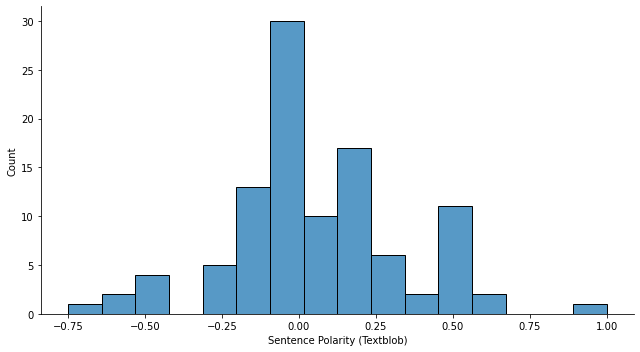

In [8]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

In [31]:
from nltk.stem import PorterStemmer
ls = PorterStemmer()
stem_tokens = []
for t in t_data:
    stemmed = ls.stem(t)
    stem_tokens.append(stemmed)
stem_tokens

['home',
 'kari',
 'lake',
 "'s",
 'elect',
 'fraud',
 'case',
 'will',
 'go',
 'to',
 'trial',
 ':',
 'republican',
 'warn',
 'american',
 'to',
 "'buckl",
 'up',
 "'",
 'as',
 'she',
 'attempt',
 'to',
 'overturn',
 'arizona',
 'elect',
 'result',
 ':',
 "'these",
 'peopl',
 'are',
 'corrupt',
 "'",
 'transgend',
 "'pervert",
 "'",
 'is',
 'arrest',
 '15',
 'month',
 'after',
 'she',
 "'expos",
 'herself',
 'to',
 'women',
 'and',
 'girl',
 'at',
 'wi',
 'spa',
 'in',
 'la',
 "'",
 'trigger',
 'violent',
 'protest',
 'from',
 'antifa',
 'goon',
 'who',
 'brand',
 'alleg',
 'a',
 'bigot',
 'hoax',
 'mysteri',
 'shock',
 'wave',
 'crack',
 'earth',
 "'s",
 'magnetospher',
 'that',
 'protect',
 'our',
 'planet',
 'from',
 'danger',
 'space',
 'radiat',
 'trump',
 'face',
 'up',
 'to',
 'forti',
 'year',
 'in',
 'prison',
 'if',
 'convict',
 'on',
 'all',
 'four',
 'feder',
 'charg',
 'from',
 'jan.',
 '6',
 'committe',
 'and',
 'could',
 'be',
 'bar',
 'from',
 'run',
 'for',
 'presid',

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

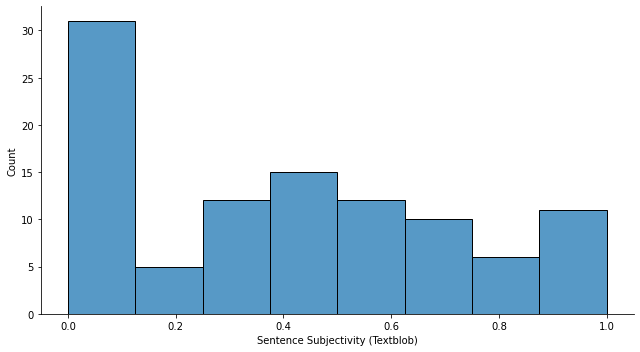

In [32]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [45]:
stop_words = set(stopwords.words('english'))
 

# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in t_data if not w in stop_words]
#with no lower case conversion

filtered_sentence = []
 
for w in t_data:
    if w not in stop_words:
        filtered_sentence.append(w)
new_list=[x for x in filtered_sentence if len(x)>1]

In [46]:
import nltk
import matplotlib.pyplot as plt


def plotfreq(x, title=""):
    flat =[]
    for i in x:
        flat += i
    f = nltk.FreqDist(x)
    
    plt.figure(figsize=(20,20))
    plt.title(title)
    f.plot()

In [47]:
import re

regex = re.compile('[^a-zA-Z]')
cleanData = []
for i in new_list:
    cleanData.append(regex.sub('', i))
    while '' in cleanData:
        cleanData.remove('') 
    

In [48]:
cleanData

['Home',
 'Kari',
 'Lake',
 's',
 'election',
 'fraud',
 'case',
 'WILL',
 'go',
 'trial',
 'Republican',
 'warns',
 'Americans',
 'buckle',
 'attempts',
 'overturn',
 'Arizona',
 'election',
 'result',
 'These',
 'people',
 'corrupt',
 'Transgender',
 'pervert',
 'arrested',
 'months',
 'exposed',
 'women',
 'girls',
 'Wi',
 'Spa',
 'LA',
 'triggering',
 'violent',
 'protests',
 'Antifa',
 'goons',
 'branded',
 'allegations',
 'bigoted',
 'hoax',
 'Mysterious',
 'shock',
 'wave',
 'CRACKS',
 'Earth',
 's',
 'magnetosphere',
 'protects',
 'planet',
 'dangerous',
 'space',
 'radiation',
 'Trump',
 'faces',
 'FORTY',
 'YEARS',
 'prison',
 'convicted',
 'four',
 'federal',
 'charges',
 'Jan',
 'committee',
 'could',
 'BARRED',
 'running',
 'president',
 'Harvey',
 'Weinstein',
 'found',
 'GUILTY',
 'sexrelated',
 'counts',
 'Los',
 'Angeles',
 'court',
 'Disgraced',
 'Hollywood',
 'mogul',
 'acquitted',
 'sexual',
 'battery',
 'jury',
 'still',
 'HUNG',
 'counts',
 'silent',
 'America',
 

In [39]:
from collections import Counter
my_counter = Counter(cleanData)
print(my_counter)

Counter({'s': 48, 'The': 11, 'US': 8, 'Trump': 7, 'people': 6, 'man': 6, 'Christmas': 6, 'nt': 6, 'death': 6, 'border': 6, 'World': 6, 'Cup': 6, 'Messi': 5, 'says': 5, 'three': 5, 'years': 5, 'fans': 5, 'million': 5, 'arrested': 4, 'months': 4, 'charges': 4, 'Jan': 4, 'could': 4, 'found': 4, 'Disgraced': 4, 'Biden': 4, 'House': 4, 'What': 4, 'missing': 4, 'home': 4, 'life': 4, 're': 4, 'Twitter': 4, 'six': 4, 'fraud': 3, 'faces': 3, 'committee': 3, 'running': 3, 'first': 3, 'makes': 3, 'Lionel': 3, 'behind': 3, 'New': 3, 'testimony': 3, 'campaign': 3, 'January': 3, 'slams': 3, 'reveals': 3, 'It': 3, 'jail': 3, 'two': 3, 'NYC': 3, 'Title': 3, 'billion': 3, 'black': 3, 'pay': 3, 'star': 3, 'stars': 3, 'parents': 3, 'without': 3, 'close': 3, 'Harry': 3, 'Queen': 3, 'yearold': 3, 'fan': 3, 'trophy': 3, 'back': 3, 'family': 3, 'like': 3, 'Kari': 2, 'Lake': 2, 'election': 2, 'WILL': 2, 'trial': 2, 'Republican': 2, 'warns': 2, 'attempts': 2, 'LA': 2, 'violent': 2, 'protests': 2, 'Antifa': 2, 

In [40]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in cleanData:
    lemma = ls.lemmatize(t) 
    stem_tokens.append(lemma)

In [41]:
from collections import Counter
my_counter = Counter(stem_tokens)
print(my_counter)

Counter({'s': 48, 'The': 11, 'fan': 8, 'US': 8, 'Trump': 7, 'people': 6, 'man': 6, 'Christmas': 6, 'nt': 6, 'say': 6, 'death': 6, 'million': 6, 'year': 6, 'border': 6, 'star': 6, 'World': 6, 'Cup': 6, 'month': 5, 'Messi': 5, 'three': 5, 'arrested': 4, 'charge': 4, 'Jan': 4, 'could': 4, 'found': 4, 'Disgraced': 4, 'Biden': 4, 'House': 4, 'make': 4, 'What': 4, 'missing': 4, 'slam': 4, 'home': 4, 'life': 4, 'pay': 4, 'parent': 4, 'family': 4, 're': 4, 'Twitter': 4, 'six': 4, 'fraud': 3, 'face': 3, 'committee': 3, 'running': 3, 'take': 3, 'first': 3, 'Lionel': 3, 'behind': 3, 'break': 3, 'New': 3, 'show': 3, 'testimony': 3, 'campaign': 3, 'January': 3, 'member': 3, 'reveals': 3, 'It': 3, 'temperature': 3, 'jail': 3, 'two': 3, 'NYC': 3, 'hit': 3, 'force': 3, 'Title': 3, 'week': 3, 'billion': 3, 'black': 3, 'without': 3, 'get': 3, 'child': 3, 'close': 3, 'Harry': 3, 'Queen': 3, 'yearold': 3, 'trophy': 3, 'back': 3, 'like': 3, 'Kari': 2, 'Lake': 2, 'election': 2, 'WILL': 2, 'trial': 2, 'Repub

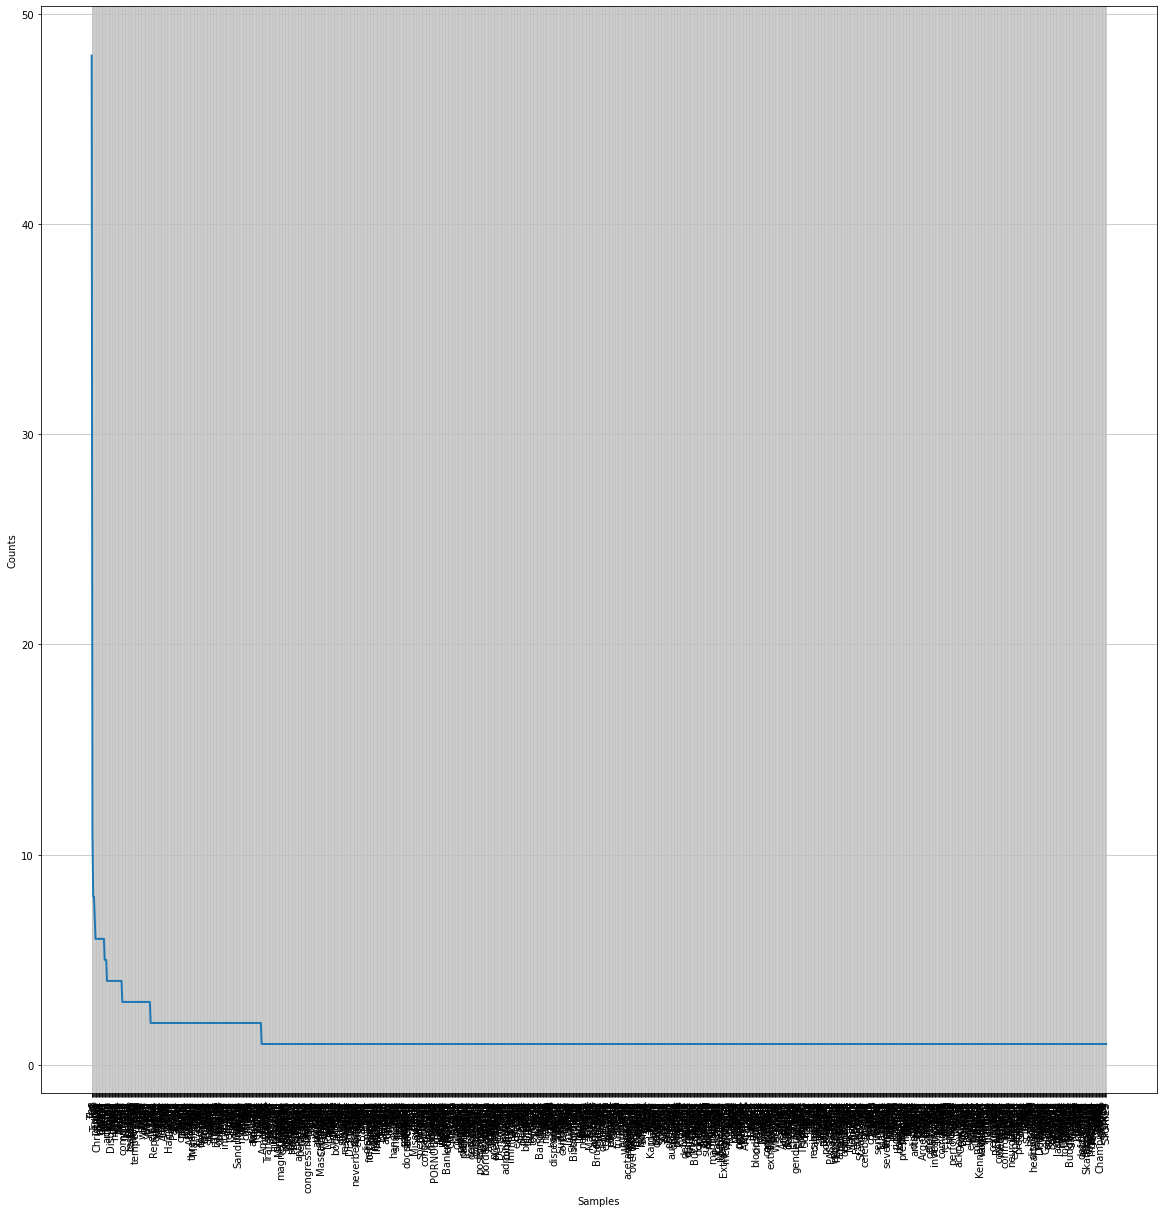

In [42]:
plotfreq(stem_tokens)

In [43]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

In [44]:
clean_text= stem_tokens.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

AttributeError: 'list' object has no attribute 'replace'

In [ ]:
sentence=[]
tokens = nlp(stem_tokens)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
# Import the Naive Bayes Classification algorithm
from nltk.classify import NaiveBayesClassifier

# Import the subjectivity test corpus
from nltk.corpus import subjectivity

# Import the sentiment analysis libraries
from nltk.sentiment import SentimentAnalyzer

# Import the utilities library
from nltk.sentiment.util import *

from nltk.sentiment import SentimentAnalyzer

sentim_anl = SentimentAnalyzer()
all_words = sentim_anl.all_words([mark_negation(doc) for doc in stem_tokens])
all_words

In [ ]:
len(all_words)